<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/M44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler #mean =0, std =1
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of X : ",X.shape)
print("Target Classes : ",np.unique(y))
X.head()

Shape of X :  (178, 13)
Target Classes :  [0 1 2]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
#stratify = y -> makes sure each class is equally represented in both sets

In [ ]:
#Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Apply LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("Shape after LDA : ",X_train_lda.shape)

Shape after LDA :  (142, 2)


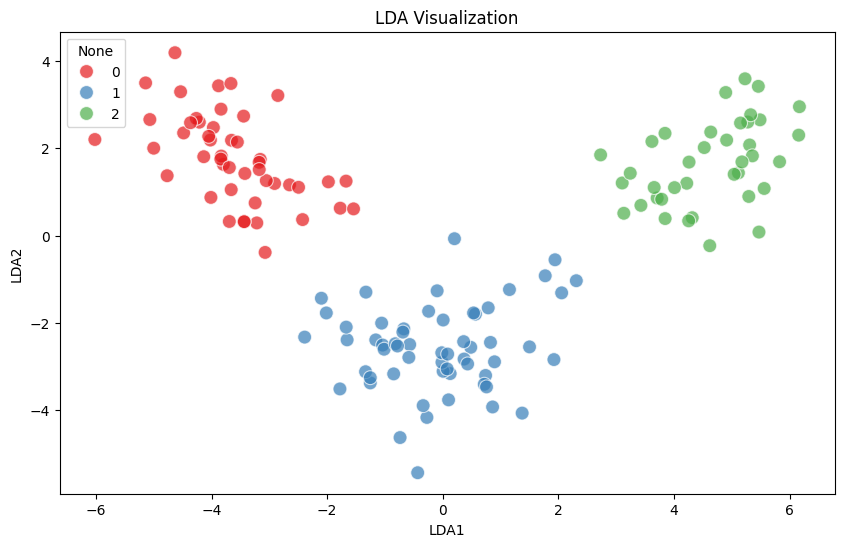

In [ ]:
#Visulaize
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_train_lda[:,0],y=X_train_lda[:,1],hue = y_train,palette='Set1',s=100,alpha=0.7)
plt.title("LDA Visualization")
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X_train_lda,y_train)

#Predict and check accuracy
y_pred = model.predict(X_test_lda)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.97
